In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

#Entrenamos los vectorizadores para utilizar únicamente términos que aparezcan mas de 2 veces en los comentarios de puntajes bajos
vectorizer_bajo = CountVectorizer(min_df=2, lowercase=True)
#Entrenamos los vectorizadores para utilizar todos los terminos en los comentarios de puntajes altos
vectorizer_alto = CountVectorizer()
#Entrenamos los vectorizadores para utilizar únicamente términos que aparezcan mas de 5 veces en el total de comentarios
vectorizer_todo = CountVectorizer(min_df=5, lowercase=True)

#Ahora, extraemos las representaciones:
features_bow_todos = vectorizer_todo.fit_transform(corpus1)
features_bow_bajos = vectorizer_bajo.fit_transform(corpus_bajos)
features_bow_altos = vectorizer_alto.fit_transform(corpus_altos)

vocab_bow_todos = vectorizer_todo.get_feature_names_out(corpus1)
vocab_bow_altos = vectorizer_alto.get_feature_names_out(corpus_altos)
vocab_bow_bajos = vectorizer_bajo.get_feature_names_out(corpus_bajos)


In [ ]:
lda_todos = LatentDirichletAllocation(
    n_components=10,
    doc_topic_prior=1/10,
    topic_word_prior=1/10,
    random_state=24,
    ).fit(features_bow_todos)

In [ ]:
lda_bajos = LatentDirichletAllocation(
    n_components=7,
    doc_topic_prior=1/5,
    topic_word_prior=1/5,
    random_state=24,
    ).fit(features_bow_bajos)

In [ ]:
lda_altos = LatentDirichletAllocation(
    n_components=7,
    doc_topic_prior=1/5,
    topic_word_prior=1/5,
    random_state=24,
    ).fit(features_bow_altos)

In [ ]:
features_lda_todos = lda_todos.transform(features_bow_todos)
print(features_lda_todos.shape)

(55524, 10)


In [ ]:
features_lda_altos = lda_altos.transform(features_bow_altos)
print(features_lda_altos.shape)

(46940, 7)


In [ ]:
features_lda_bajos = lda_bajos.transform(features_bow_bajos)
print(features_lda_bajos.shape)

(8584, 7)


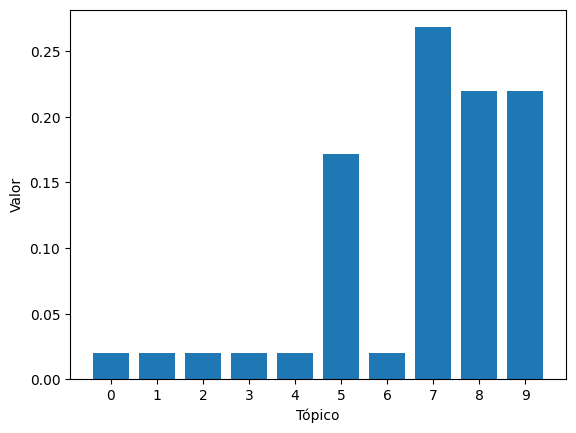

In [ ]:
doc_id = 23231
doc_features = features_lda_todos[doc_id]
fig, ax = plt.subplots()
ax.bar(np.arange(doc_features.size), doc_features);
ax.set_xlabel("Tópico");
ax.set_ylabel("Valor");
ax.set_xticks(np.arange(doc_features.size));
fig.show()

In [ ]:
#Comentario Original
doc_id = 23231
print(corpus[doc_id])
print(corpus1[doc_id])

El stock es muy ineficiente y la app tiene una interfaz terrible, muchos bugs
stock ineficiente app interfaz terrible bugs


In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
sim = cosine_similarity(features_lda_todos[doc_id, np.newaxis], features_lda_todos).flatten()
print(sim.shape)

(55524,)


In [ ]:
#Top 5 comentarios similares o relacionados segun el modelo
sims = pd.DataFrame(data={"text": corpus1, "sim": sim})
top4 = (
        sims
        .sort_values(by="sim", ascending=False)
        .head(6)
        )
for doc in top4.iloc[1:, 0]:
    print("=" * 50)
    print(doc)

app adquirir producto modelo producto deber promocion
bajar calidad app mandar tienda
rapido elservicio temperatura adecuado mejorar app hora recibir elproducto seguia aparecer preparar ofrecer hielo venta encontrar ocupar
precio igualar cobrar envio comodidad salir recibir producto puerta hogar valer unico inconveniente noche cerrar tienda app dejar pedido tienda sucursal solicitar producto cerrar hrs dejar pedido detalle mejorar general
esperar pagina funcional promocion seleccionar pedido vender articulo


In [ ]:
components = lda_todos.components_
# Iteramos sobre cada tópico
for i, comp in enumerate(components):
    # Juntamos los términos con cada uno de los valores en la matriz V
    terms_comp = zip(vocab_bow_todos, np.abs(comp))
    # Ordenamos los términos de acuerdo al resultado de LSA
    sorted_terms = sorted(
            terms_comp,
            key=lambda x: x[1],
            reverse=True
            )[:15]
    # Mostramos los términos más importantes en cada tópico
    print(
            "Tópico {}: {}".format(
                i,
                " ".join(list(map(lambda x:x[0], sorted_terms)))
                )
            )

Tópico 0: servicio exelente variedad horario botana puntual preciir gracias encantar execelente ampliar faltar chido felicidades vino
Tópico 1: excelente servicio rapido entrega eficiente super amable seguro eficaz confiable felicidad gracias rapir frias helada
Tópico 2: precio rapidez super rapido fria entrega llegar bebida gracias casa comodidad recomendable chela amabilidad salir
Tópico 3: aplicacion ddv pago tarjeta repartidor pagar encantar perfecto efectivo terminal traer barato cambiar cambio precios
Tópico 4: tiempo entrega atencion envio llegar tardar pedido cobrar hora respuesta velocidad economico recomeir espera mejorar
Tópico 5: pedido hielo cupon modelo promos pedir cancelar cerveza descuento traer corona tener mandar llego faltar
Tópico 6: cerveza fria llegar rapido frio domicilio caliente oferta facil helado traer estar venir genial surtido
Tópico 7: promocion repartidor envio seguir tienda cliente cupon costo cobrar amable compra comprar dar salir descuento
Tópico 8: p

In [ ]:
components_altos = lda_altos.components_
# Iteramos sobre cada tópico
for i, comp in enumerate(components_altos):
    # Juntamos los términos con cada uno de los valores en la matriz V
    terms_comp = zip(vocab_bow_altos, np.abs(comp))
    # Ordenamos los términos de acuerdo al resultado de LSA
    sorted_terms = sorted(
            terms_comp,
            key=lambda x: x[1],
            reverse=True
            )[:15]
    # Mostramos los términos más importantes en cada tópico
    print(
            "Tópico {}: {}".format(
                i,
                " ".join(list(map(lambda x:x[0], sorted_terms)))
                )
            )

Tópico 0: excelente servicio promocion exelente app repartidor amable ok recomendado felicidad amigo sigan mejorar felicidades cosa
Tópico 1: tiempo entrega oferta cerveza modelo costo opcion botana estar mejor genial cigarro horario seguro surtido
Tópico 2: producto cerveza frio aplicacion pedido llegar hielo pedir variedad repartidor traer tener recomendable entregar ddv
Tópico 3: rapido fria llegar cerveza entrega tiempo eficiente facil bebida promos entregar pedido pago amable helado
Tópico 4: servicio precio rapido super gracias entrega domicilio seguir confiable velocidad accesibl general momento execelente justo
Tópico 5: envio cupon gustar descuento facilidad practico cobrar gracia cliente compra app dar comprar puntual economico
Tópico 6: rapidez atencion precio calidad entrega casa encantar comodidad producto variedad perfecto salir eficiencia amabilidad puerta


In [ ]:
components_bajos = lda_bajos.components_
# Iteramos sobre cada tópico
for i, comp in enumerate(components_bajos):
    # Juntamos los términos con cada uno de los valores en la matriz V
    terms_comp = zip(vocab_bow_bajos, np.abs(comp))
    # Ordenamos los términos de acuerdo al resultado de LSA
    sorted_terms = sorted(
            terms_comp,
            key=lambda x: x[1],
            reverse=True
            )[:15]
    # Mostramos los términos más importantes en cada tópico
    print(
            "Tópico {}: {}".format(
                i,
                " ".join(list(map(lambda x:x[0], sorted_terms)))
                )
            )

Tópico 0: envio cobrar precio salir tienda comprar costo caro pedir oxxo repartidor cobro envase aparte gratis
Tópico 1: pedido cancelar poner ddv pedir aceptar querer tienda atencion repartidor precio surtido traer seguido cambiar
Tópico 2: producto servicio tiempo entrega variedad mejorar disponible app falta aplicacion faltar tener stock existencia promocion
Tópico 3: cerveza fria caliente pedir modelo frio mandar corona entregar victoria llevar venir mega estar llego
Tópico 4: pedido cupon entregar tardar hora descuento llegar repartidor servicio marcar llego aplicacion cancelar app el
Tópico 5: llegar cerveza traer hielo rapido caliente fria pedido tiempo ocasion pedir servicio promos lata tardar
Tópico 6: promocion repartidor tarjeta terminal horario pago pagar precio subir app malo servicio mejor aplicacion tener


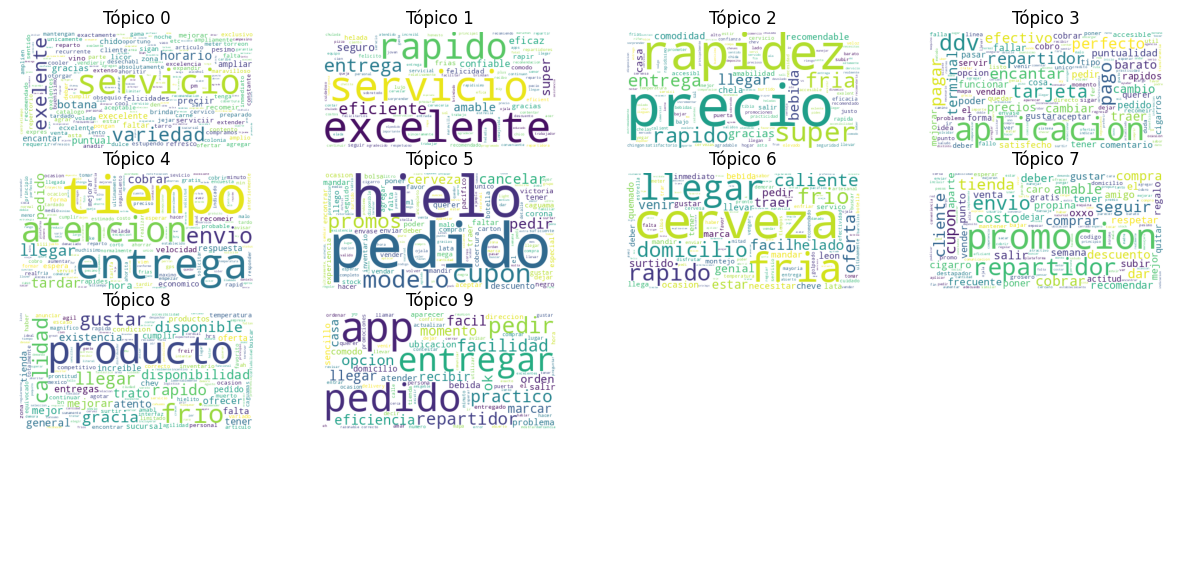

In [ ]:
#Modelo general

fig, axes = plt.subplots(4, 4, figsize=(15, 7))
cont = 0
for i in range(4):
    for j in range(4):
        ax = axes[i, j]
        if cont < len(components): # Check if cont is within the bounds of components
            freqs = {
                term: abs(float(importance))
                for term, importance in zip(vocab_bow_todos, components[cont])
            }
            wc = WordCloud(background_color="white").generate_from_frequencies(freqs)
            ax.imshow(wc)
            ax.axis("off")
            ax.set_title(f"Tópico {cont}")
            cont += 1
        else:
            ax.axis("off") # Turn off axis for the empty subplot
fig.show()

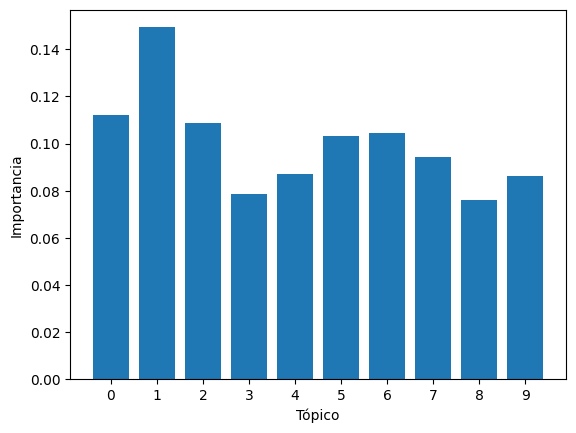

In [ ]:
topic_importances = features_lda_todos.mean(axis=0)

fig, ax = plt.subplots()
ax.bar(np.arange(topic_importances.size), topic_importances)
ax.set_xticks(np.arange(topic_importances.size));
ax.set_xlabel("Tópico")
ax.set_ylabel("Importancia")
fig.show()

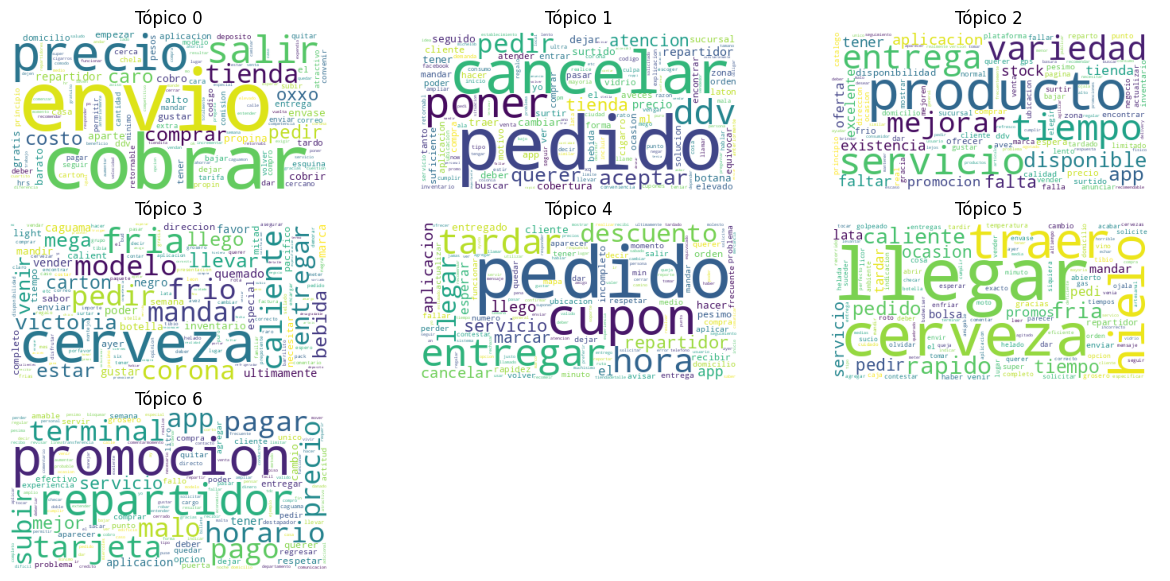

In [ ]:
#Modelo comentarios bajos

fig, axes = plt.subplots(3, 3, figsize=(15, 7))
cont = 0
for i in range(3):
    for j in range(3):
        ax = axes[i, j]
        if cont < len(components_bajos): # Check if cont is within the bounds of components
            freqs = {
                term: abs(float(importance))
                for term, importance in zip(vocab_bow_bajos, components_bajos[cont])
            }
            wc = WordCloud(background_color="white").generate_from_frequencies(freqs)
            ax.imshow(wc)
            ax.axis("off")
            ax.set_title(f"Tópico {cont}")
            cont += 1
        else:
            ax.axis("off") # Turn off axis for the empty subplot
fig.show()

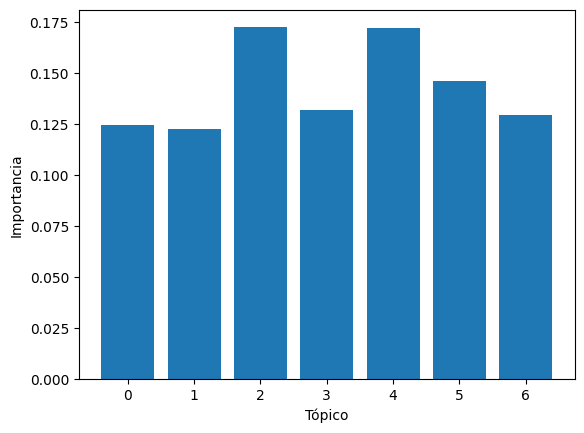

In [ ]:
topic_importances = features_lda_bajos.mean(axis=0)

fig, ax = plt.subplots()
ax.bar(np.arange(topic_importances.size), topic_importances)
ax.set_xticks(np.arange(topic_importances.size));
ax.set_xlabel("Tópico")
ax.set_ylabel("Importancia")
fig.show()

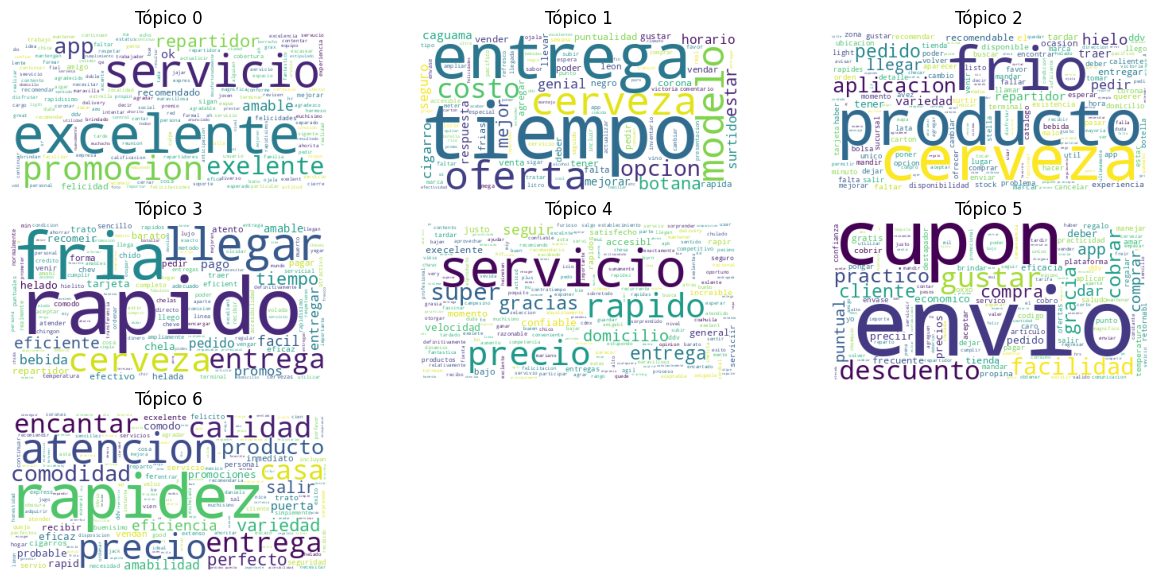

In [ ]:
#Modelo comentarios altos

fig, axes = plt.subplots(3, 3, figsize=(15, 7))
cont = 0
for i in range(3):
    for j in range(3):
        ax = axes[i, j]
        if cont < len(components_altos): # Check if cont is within the bounds of components
            freqs = {
                term: abs(float(importance))
                for term, importance in zip(vocab_bow_altos, components_altos[cont])
            }
            wc = WordCloud(background_color="white").generate_from_frequencies(freqs)
            ax.imshow(wc)
            ax.axis("off")
            ax.set_title(f"Tópico {cont}")
            cont += 1
        else:
            ax.axis("off") # Turn off axis for the empty subplot
fig.show()

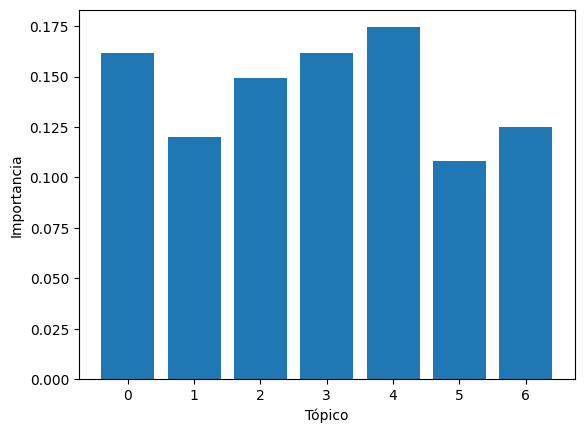

In [ ]:
topic_importances = features_lda_altos.mean(axis=0)

fig, ax = plt.subplots()
ax.bar(np.arange(topic_importances.size), topic_importances)
ax.set_xticks(np.arange(topic_importances.size));
ax.set_xlabel("Tópico")
ax.set_ylabel("Importancia")
fig.show()

Alternativamente modelo Bertopic

In [ ]:
pip install bertopic

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 245.3/245.3 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.8 MB/s eta 0:00:00


In [ ]:
from bertopic import BERTopic
import numpy as np

TypeError: Make sure that the iterable only contains strings.

In [ ]:
# Función para obtener el embedding promedio de los tokens de un comentario
def get_comment_embedding(tokens, model):
    vectors = [model.wv[word] for word in tokens if word in model.wv]  # Obtén el embedding de cada token
    if len(vectors) > 0:
        return np.mean(vectors, axis=0)  # Promedia los embeddings
    else:
        return np.zeros(model.vector_size)  # Devuelve un vector de ceros si no hay tokens válidos

# Generar los embeddings para cada comentario
comment_embeddings_bajo = [get_comment_embedding(comment_tokens, model_bajo) for comment_tokens in tokens_bajo]

# Convertir los embeddings a una matriz de numpy
embeddings_bajo = np.vstack(comment_embeddings_bajo)

In [ ]:
# Crear el modelo BERTopic sin modelo de embeddings, ya que ya tienes los embeddings
topic_model = BERTopic(embedding_model=None, min_topic_size= 300)

df_bajos = df[df['SCORE'] < 9]
comments_bajo = df_bajos['COMMENT'].tolist()

# Ajustar BERTopic con los comentarios originales y los embeddings generados
topics, probs = topic_model.fit_transform(corpus_bajos, embeddings_bajo)




   Topic  Count                                Name  \
0     -1   4297  -1_pedido_cupon_producto_promocion   
1      0   7261       0_cerveza_pedido_llegar_envio   
2      1    338         1_app_mejorar_producto_trar   

                                      Representation  \
0  [pedido, cupon, producto, promocion, frio, lle...   
1  [cerveza, pedido, llegar, envio, producto, ped...   
2  [app, mejorar, producto, trar, fallar, tienda,...   

                                 Representative_Docs  
0   [promocion cupon, cupon pedido, cupon promocion]  
1  [cerveza llegar fria, llegar fria cerveza, lle...  
2                            [mejorar app, app, app]  
[('cerveza', 0.09392142013885983), ('pedido', 0.08691308757239735), ('llegar', 0.061335311810438164), ('envio', 0.057619893585696184), ('producto', 0.05462093161078982), ('pedir', 0.053200115722459265), ('repartidor', 0.04999621106315387), ('cobrar', 0.049905875536552124), ('servicio', 0.04920743501407046), ('entregar', 0.0440803461

In [ ]:
# Mostrar los temas más importantes
topic_info = topic_model.get_topic_info()
print(topic_info)

# Ver los términos más representativos de un tema
print(topic_model.get_topic(0))

   Topic  Count                                Name  \
0     -1   4297  -1_pedido_cupon_producto_promocion   
1      0   7261       0_cerveza_pedido_llegar_envio   
2      1    338         1_app_mejorar_producto_trar   

                                      Representation  \
0  [pedido, cupon, producto, promocion, frio, lle...   
1  [cerveza, pedido, llegar, envio, producto, ped...   
2  [app, mejorar, producto, trar, fallar, tienda,...   

                                 Representative_Docs  
0   [promocion cupon, cupon pedido, cupon promocion]  
1  [cerveza llegar fria, llegar fria cerveza, lle...  
2                            [mejorar app, app, app]  
[('cerveza', 0.09392142013885983), ('pedido', 0.08691308757239735), ('llegar', 0.061335311810438164), ('envio', 0.057619893585696184), ('producto', 0.05462093161078982), ('pedir', 0.053200115722459265), ('repartidor', 0.04999621106315387), ('cobrar', 0.049905875536552124), ('servicio', 0.04920743501407046), ('entregar', 0.0440803461

In [ ]:
print(topic_info)


   Topic  Count                                Name  \
0     -1   4297  -1_pedido_cupon_producto_promocion   
1      0   7261       0_cerveza_pedido_llegar_envio   
2      1    338         1_app_mejorar_producto_trar   

                                      Representation  \
0  [pedido, cupon, producto, promocion, frio, lle...   
1  [cerveza, pedido, llegar, envio, producto, ped...   
2  [app, mejorar, producto, trar, fallar, tienda,...   

                                 Representative_Docs  
0   [promocion cupon, cupon pedido, cupon promocion]  
1  [cerveza llegar fria, llegar fria cerveza, lle...  
2                            [mejorar app, app, app]  


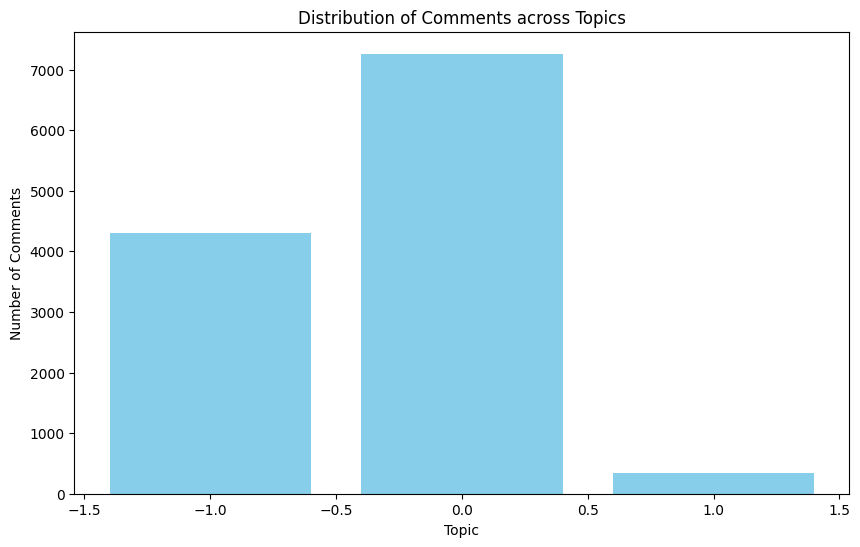

In [ ]:
# Obtener la información de los temas
topic_info = topic_model.get_topic_info()

# Filtrar el tema -1 (outliers) si está presente
#topic_info = topic_info[topic_info.Topic != -1]

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(topic_info['Topic'], topic_info['Count'], color='skyblue')
plt.xlabel('Topic')
plt.ylabel('Number of Comments')
plt.title('Distribution of Comments across Topics')
plt.show()


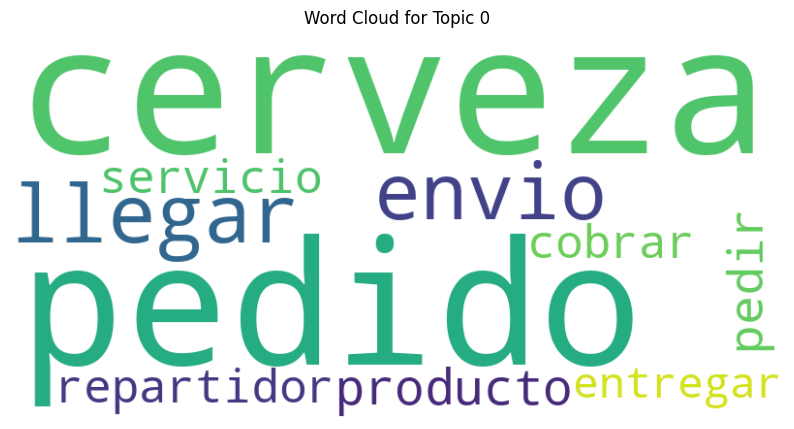

In [ ]:
def create_wordcloud(topic_model, topic_num):
    words = dict(topic_model.get_topic(topic_num))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(words)

    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.title(f'Word Cloud for Topic {topic_num}')
    plt.show()

# Crear la nube de palabras para el tema 0 (puedes cambiar el número del tema)
create_wordcloud(topic_model, 0)

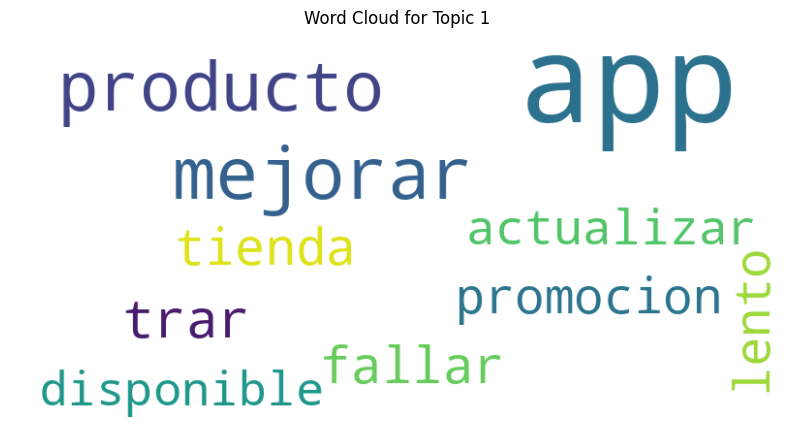

In [ ]:
create_wordcloud(topic_model, 1)

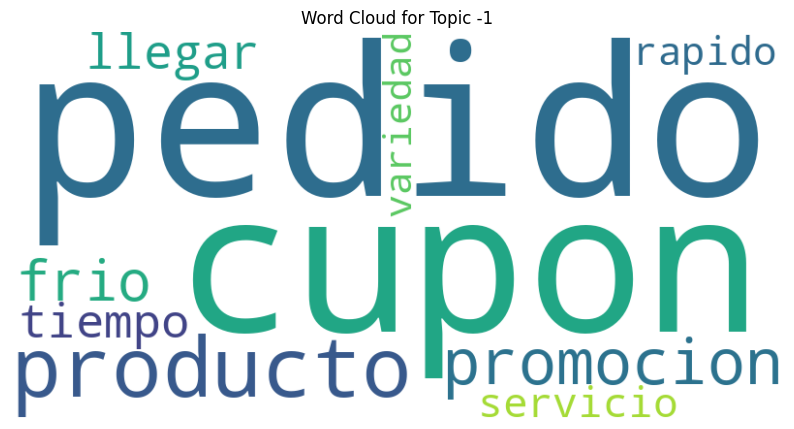

In [ ]:
create_wordcloud(topic_model, -1)